In [ ]:
!python2 SVM_rank_py/initial_ranking_with_svm_rank_yahoo.py svm_rank/  yahoodata/set1.train.txt  yahoodata/set1.valid.txt yahoodata/set1.test.txt output_svmrank_yahoo/

svm_rank/svm_rank_learn -c 200 yahoodata/set1.train.txt output_svmrank/model.dat
Reading training examples...

In [3]:
import Tao_lib.IR as IR

In [ ]:
data=IR.np_Read_qd.np_Read_qd("yahoodata/set1.valid.txt")
data_ranked=IR.np_Read_qd.np_Read_qd("output_svmrank_yahoo/valid.predict")
data_test=IR.np_Read_qd.np_Read_qd("yahoodata/set1.test.txt")
data_ranked_text=IR.np_Read_qd.np_Read_qd("output_svmrank_yahoo/test.predict")

In [ ]:
print(data[1,:])
print(data_ranked.shape)

In [ ]:
import numpy as np
aver=0
data_ranked1=data_ranked_test[:,0]
print(data_ranked1.shape)
unique_indice=np.unique(data_test[:,1])
n=0
m=0
def batch_NDCG(data_file,data_ranked_file,K=1):
    n=0
    m=0
    aver=0
    data=IR.np_Read_qd.np_Read_qd(data_file)
    data_ranked=IR.np_Read_qd.np_Read_qd(data_ranked_file)
    data_ranked_flat=data_ranked[:,0]
    unique_indice=np.unique(data[:,1])
    for i in range(unique_indice.shape[0]):
        #print(unique_indice[i])
        ind=np.where(data[:,1]==unique_indice[i])
        #print(ind)
        #print(data_ranked[ind,:])
        score_=data_ranked_flat[ind]
        scores_ind=np.argsort(-score_)

        #print(score_[scores_ind])
        #print(scores_ind)
        correl=data[:,0][ind]
        #print(np.unique(correl))
        if np.unique(correl).shape[0]==1:

            continue
        n=n+1
        #print(correl)
        ordered_list=correl[scores_ind]
        if ordered_list[0]==np.max(correl):
            m=m+1

        #print(ordered_list)
        #print(ordered_list)
        g=IR.NDCG.ndcg(ordered_list,K)
        aver=aver+g
        #print(g)
    if K==1:
        print("top 1 accuracy is",float(m)/n)
    aver1=aver/n
    return aver1
    
    
    
    
    



In [ ]:
def batch_NDCG(data_file,data_ranked_file,K=1):
    n=0
    m=0
    aver=0
    data=IR.np_Read_qd.np_Read_qd(data_file)
    data_ranked=IR.np_Read_qd.np_Read_qd(data_ranked_file)
    data_ranked_flat=data_ranked[:,0]
    unique_indice=np.unique(data[:,1])
    for i in range(unique_indice.shape[0]):
        #print(unique_indice[i])
        ind=np.where(data[:,1]==unique_indice[i])
        #print(ind)
        #print(data_ranked[ind,:])
        score_=data_ranked_flat[ind]
        scores_ind=np.argsort(-score_)

        #print(score_[scores_ind])
        #print(scores_ind)
        correl=data[:,0][ind]
        #print(np.unique(correl))
        if np.unique(correl).shape[0]==1:

            continue
        n=n+1
        #print(correl)
        ordered_list=correl[scores_ind]
        if ordered_list[0]==np.max(correl):
            m=m+1

        #print(ordered_list)
        #print(ordered_list)
        g=IR.NDCG.ndcg(ordered_list,K)
        aver=aver+g
        #print(g)
    
    print("for top 1 is",m,"out of ",n,"is correct, and the accuracy is ",float(m)/n)
    aver1=aver/n
    return aver1

In [1]:
import numpy as np

In [2]:
import Tao_lib.IR as IR

   
hh=IR.batch_NDCG.batch_NDCG("yahoodata/set1.test.txt","output_svmrank/test.predict",K=np.arange(1,10))
    

processing for top 1  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 2  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 3  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 4  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 5  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 6  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 7  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 8  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089
processing for top 9  NDCG
for top 1 is 3477 out of  6561 is correct, and the accuracy is  0.5299497027892089


In [9]:
print(hh)
hh=np.array(hh)

[0.64979787 0.65479128 0.66398268 0.67649596 0.68960483 0.70296654
 0.71461898 0.72506344 0.7347475 ]


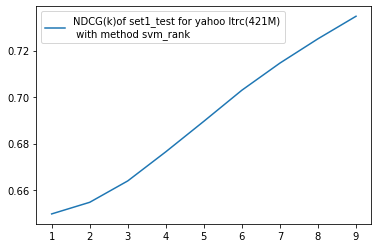

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.arange(hh.shape[0])+1,hh,label="NDCG(k)of set1_test for yahoo ltrc(421M)\n with method svm_rank")
ax.legend()
plt.show()

In [5]:
1481/2816.0


0.5259232954545454

In [8]:
np.arange(19)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [130]:
!python2 SVM_rank_py/initial_ranking_with_svm_rank_yahoo.py svm_rank/  MSLR_10k/Fold1/train.txt_sorted  MSLR_10k/Fold1/valid.txt_sorted MSLR_10k/Fold1/test.txt_sorted output_svmrank_mslr_ten/

svm_rank/svm_rank_learn -c 200 MSLR_10k/Fold1/train.txt_sorted output_svmrank_mslr_ten/model.dat
Reading training examples...^C
svm_rank/svm_rank_classify MSLR_10k/Fold1/train.txt_sorted output_svmrank_mslr_ten/model.dat output_svmrank_mslr_ten/train.predict
Reading model...output_svmrank_mslr_ten/model.dat: No such file or directory
svm_rank/svm_rank_classify MSLR_10k/Fold1/valid.txt_sorted output_svmrank_mslr_ten/model.dat output_svmrank_mslr_ten/valid.predict
Reading model...output_svmrank_mslr_ten/model.dat: No such file or directory
svm_rank/svm_rank_classify MSLR_10k/Fold1/test.txt_sorted output_svmrank_mslr_ten/model.dat output_svmrank_mslr_ten/test.predict
Reading model...output_svmrank_mslr_ten/model.dat: No such file or directory


In [130]:
!python2 SVM_rank_py/initial_ranking_with_svm_rank_yahoo.py svm_rank/  MSLR_10k/Fold1/train.txt_sorted  MSLR_10k/Fold1/valid.txt_sorted MSLR_10k/Fold1/test.txt_sorted output_svmrank_mslr_ten/

svm_rank/svm_rank_learn -c 200 MSLR_10k/Fold1/train.txt_sorted output_svmrank_mslr_ten/model.dat
Reading training examples...^C
svm_rank/svm_rank_classify MSLR_10k/Fold1/train.txt_sorted output_svmrank_mslr_ten/model.dat output_svmrank_mslr_ten/train.predict
Reading model...output_svmrank_mslr_ten/model.dat: No such file or directory
svm_rank/svm_rank_classify MSLR_10k/Fold1/valid.txt_sorted output_svmrank_mslr_ten/model.dat output_svmrank_mslr_ten/valid.predict
Reading model...output_svmrank_mslr_ten/model.dat: No such file or directory
svm_rank/svm_rank_classify MSLR_10k/Fold1/test.txt_sorted output_svmrank_mslr_ten/model.dat output_svmrank_mslr_ten/test.predict
Reading model...output_svmrank_mslr_ten/model.dat: No such file or directory


In [123]:
print(data[1:300,1])

['qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157'
 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157'
 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:142'
 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142'
 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142'
 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142'
 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157'
 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:172' 'qid:172'
 'qid:172' 'qid:172' 'qid:172' 'qid:172' 'qid:172' 'qid:172' 'qid:157'
 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157'
 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157'
 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157' 'qid:157'
 'qid:157' 'qid:172' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142'
 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142' 'qid:142'
 'qid:

In [121]:
##make data qid increase in order.
data=IR.np_Read_qd.np_Read_qd("MSLR_10k/Fold1/train.txt_sorted")

In [8]:
import numpy as np
#np.savetxt('MSLR_10k/Fold1/train_sort.txt', data, delimiter=' ') 
np.savetxt('MSLR_10k/Fold1/train_sort.txt', data, delimiter=" ", fmt="%s") 

In [9]:
data_sort=IR.np_Read_qd.np_Read_qd("MSLR_10k/Fold1/train_sort.txt")

In [10]:
print(data_sort.shape)

(723412, 139)


In [11]:
print(data.shape)

(723412, 139)


In [18]:
gg=data[:,1]
print(gg)

TypeError: string operation on non-string array

In [98]:
import pandas as pd
df = pd.read_csv('yahoodata/set1.valid.txt',sep='[:\s]+', engine="python",header=None,index_col=False)

In [115]:
df_spce = pd.read_csv('yahoodata/set1.valid.txt', engine="python",header=None,index_col=False)

In [124]:
print(df_spce.shape)

(71083, 1)


In [125]:
print(df.values[0,0:10])

[1 'qid' 19945 1 0.74142 6 0.90265 7 0.8087 8]


In [126]:
def sort_qid(filename):
    df = pd.read_csv(filename,sep='[:\s]+', engine="python",header=None,index_col=False)
    df_origin = pd.read_csv(filename, engine="python",header=None,index_col=False)
    ind=np.argsort(df.values[:,2])
    df_sort=df_origin.values[ind,:]
 
    np.savetxt(filename+'_sorted', df_sort, delimiter=" ", fmt="%s") 

In [127]:
sort_qid("MSLR_10k/Fold1/vali.txt")

In [128]:
sort_qid("MSLR_10k/Fold1/test.txt")
sort_qid("MSLR_10k/Fold1/train.txt")

In [96]:
print(re.search('[:\s]+', ff))

<_sre.SRE_Match object; span=(2, 3), match=' '>


In [83]:
print(gg)

['12 qie:3 1:3 ']


In [84]:
import re

In [89]:
print(re.search("1",ff))

<_sre.SRE_Match object; span=(0, 1), match='1'>


In [91]:
import re
# regular expression
pattern1 = "dog"
pattern2 = "cat"
pattern3 = "bird"
string = "dog runs to cat"

#如果匹配成功，返回一个匹配的对象，没找到则返回none
#re.span方法显示匹配的位置
#group(num) 或 groups() 来获取匹配表达式

#re.match:匹配string初始位置
#re.match(pattern, string, flags=0)
#pattern:匹配的正则表达式;string要匹配的字符串;flags标志位，用于控制正则表达式的匹配方式
print(re.match(pattern1, string))
print(re.match(pattern1, string).span())#span函数显示匹配的位置
print(re.match(pattern1, string).group())#groop方法获取正则表达式
print(re.match(pattern2, string))
print(re.match(pattern3, string))
print('*'*50)
print(re.search(pattern1, string))  # <_sre.SRE_Match object; span=(12, 15), match='cat'>
print(re.search(pattern2, string))  #
print(re.search(pattern2, string).span())
print(re.search(pattern2, string).group())
print('*'*50)


<_sre.SRE_Match object; span=(0, 3), match='dog'>
(0, 3)
dog
None
None
**************************************************
<_sre.SRE_Match object; span=(0, 3), match='dog'>
<_sre.SRE_Match object; span=(12, 15), match='cat'>
(12, 15)
cat
**************************************************


In [104]:
dd=np.random.randint(1,9,(4))

In [106]:
print(dd)
np.argsort(dd)

[8 3 3 2]


array([3, 1, 2, 0])

In [137]:
def err(rank,K):
    output=0
    #
    rel_max=np.max(rank)
    for i in range(K):
        print(i)
        if i>=rank.shape[0]:
            continue
        resluts=(2**rank[i]-1)/2**rel_max
        if i>0:
            resluts=resluts*np.prod(1-(2**rank[0:i]-1)/2**rel_max)/(i+1)
        output=output+resluts
    return output
rank=np.array([2,1,1,1])
print(err(rank,3))

0
1
2
0.796875


In [ ]:
def batch_err(data_file,data_ranked_file,K=1):
    n=0
    m=0
    aver=0
    data=IR.np_Read_qd.np_Read_qd(data_file)
    data_ranked=IR.np_Read_qd.np_Read_qd(data_ranked_file)
    data_ranked_flat=data_ranked[:,0]
    unique_indice=np.unique(data[:,1])
    for i in range(unique_indice.shape[0]):
        #print(unique_indice[i])
        ind=np.where(data[:,1]==unique_indice[i])
        #print(ind)
        #print(data_ranked[ind,:])
        score_=data_ranked_flat[ind]
        scores_ind=np.argsort(-score_)

        #print(score_[scores_ind])
        #print(scores_ind)
        correl=data[:,0][ind]
        #print(np.unique(correl))
        if np.unique(correl).shape[0]==1:

            continue
        n=n+1
        #print(correl)
        ordered_list=correl[scores_ind]
        if ordered_list[0]==np.max(correl):
            m=m+1

        #print(ordered_list)
        #print(ordered_list)
        g=IR.Err.err(ordered_list,K)
        aver=aver+g
        #print(g)
    
    print("for top 1 is",m,"out of ",n,"is correct, and the accuracy is ",float(m)/n)
    aver1=aver/n
    return aver1